In [1]:
import numpy as np
np.random.seed(123)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#! wget https://s3.amazonaws.com/img-datasets/mnist.npz

In [3]:
f = np.load('mnist.npz')
print(f.files)
x_train, y_train = f['x_train'], f['y_train']
    
X_train, X_test, y_train, y_test = train_test_split(
        x_train, y_train, test_size=0.1, random_state=42)
    
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

['x_test', 'x_train', 'y_train', 'y_test']
(54000, 28, 28) (6000, 28, 28) (54000,) (6000,)


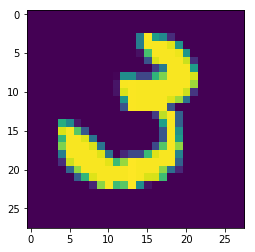

label is 3


In [4]:
index = 106

plt.imshow(X_train[index])
plt.show()

print('label is %d' % y_train[index])


In [5]:
x_train = X_train.reshape((len(X_train), -1))
x_test = X_test.reshape((len(X_test), -1))
print(x_train.shape, x_test.shape)

(54000, 784) (6000, 784)


## PCA

In [11]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(x_train)



PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
print(pca.components_.shape)
print(pca.explained_variance_.shape)

plt.plot(pca.explained_variance_)
plt.show()

plt.plot(pca.explained_variance_ratio_)
plt.show()
print(np.sum(pca.explained_variance_ratio_))

plt.plot(pca.singular_values_)
plt.show()

(784, 784)
(784,)


In [38]:
pca_test = pca.transform(x_test)
print(pca_train.shape)

(54000, 784)


[1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783]
1 0.00048138868212426535


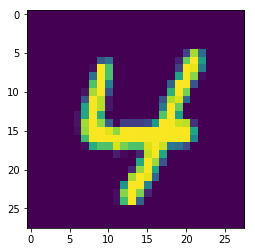

51 0.04818341142299011


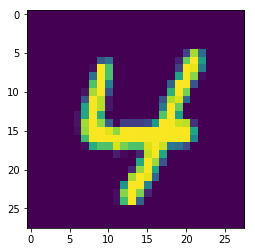

101 0.07491336338943116


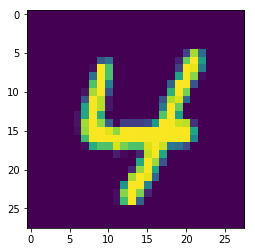

151 0.32741826925587586


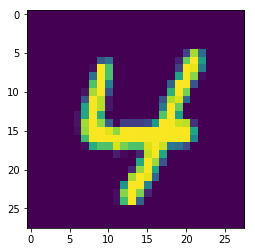

201 0.6636523462542321


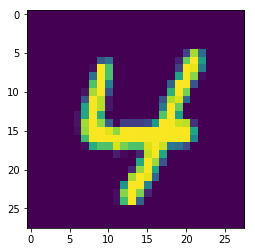

251 1.2925299899147953


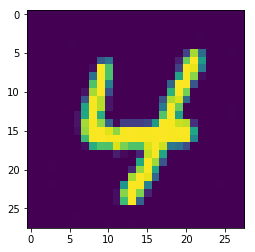

301 2.1613207767075866


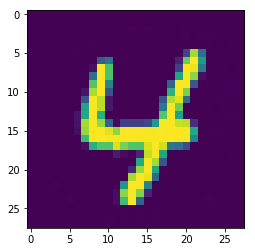

351 3.3468501586992


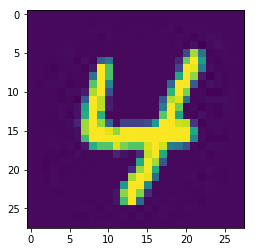

401 4.836741599099593


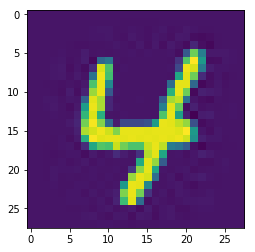

451 6.565224022030831


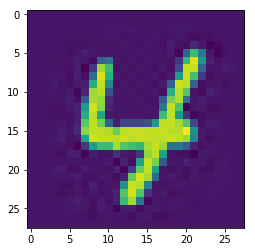

501 8.461697156955651


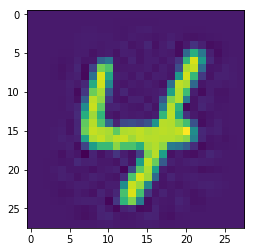

551 10.568572994988472


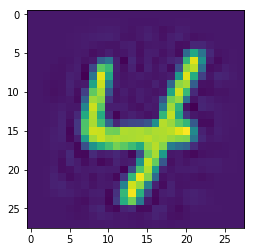

601 13.05010232653509


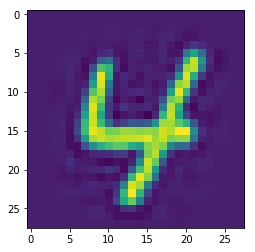

651 16.294767661523746


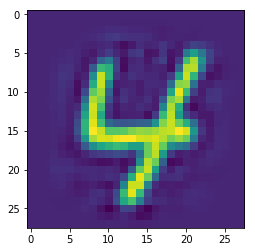

701 21.481855014784635


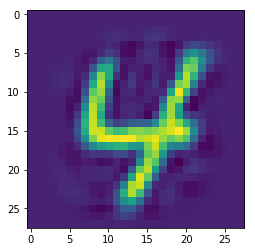

751 33.080248546501714


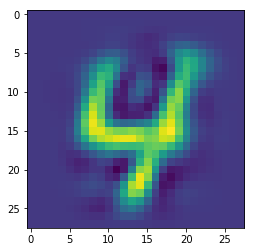

774 47.290273331540284


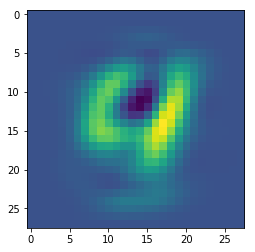

775 48.3739778144411


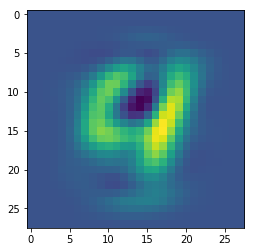

776 49.60577809031131


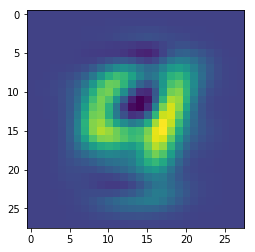

777 50.85690481860656


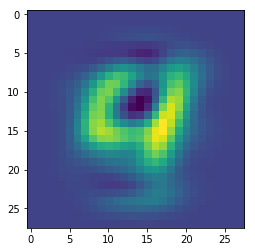

778 52.216675802208954


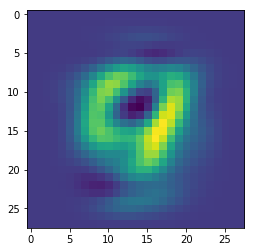

779 53.98959710441841


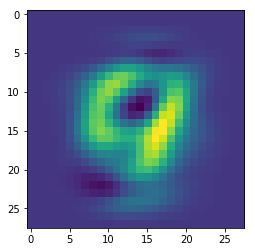

780 55.931648970790086


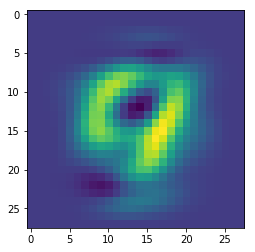

781 57.92873912214337


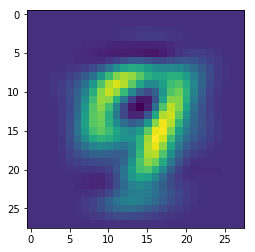

782 60.151362623971856


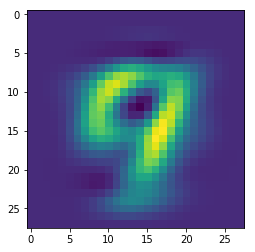

783 62.67086721734732


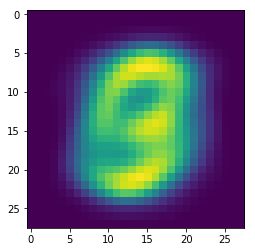

In [39]:
index = 106

inds = np.arange(1, 784, 50)
inds = list(inds)
inds.extend(list(np.arange(774,784)))

results = []
print(inds)
for i in inds:
    pca_test[:, -i:] = 0.0
    inverse_test = pca.inverse_transform(pca_test)
    
    res = np.mean((inverse_test - x_test)**2)**0.5
    results.append(res)
    
    print(i, res)
    plt.imshow(inverse_test[index].reshape(28,28))
    plt.show()

[]

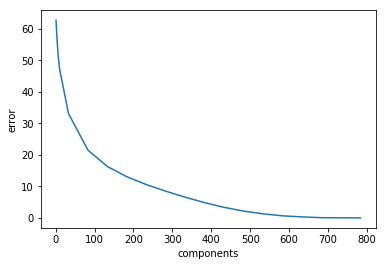

In [43]:
plt.plot(784 - np.array(inds), results)
plt.xlabel('components')
plt.ylabel('error')
plt.plot()

### Kernel PCA

In [6]:
from sklearn.decomposition import KernelPCA

pca = KernelPCA(kernel="poly", degree=2, fit_inverse_transform=True)

pca.fit(x_train[:3000])

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=2, eigen_solver='auto',
     fit_inverse_transform=True, gamma=None, kernel='poly',
     kernel_params=None, max_iter=None, n_components=None, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)

In [7]:
pca_test = pca.transform(x_test)
print(pca_test.shape)

(6000, 3000)


[1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783]
1 35.636618763167895


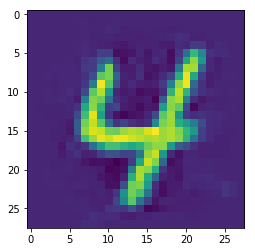

51 35.63464940958761


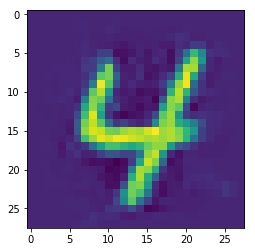

101 35.636672587435534


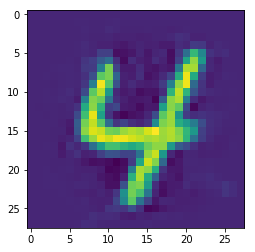

151 35.63793731031513


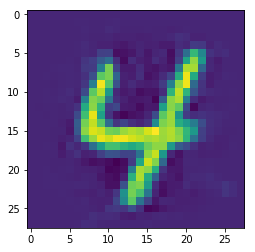

201 35.64450325797416


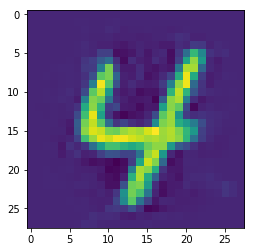

251 35.65450445410102


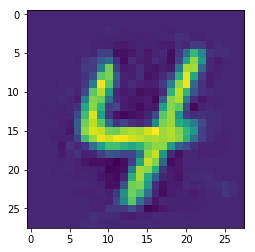

301 35.66101118700131


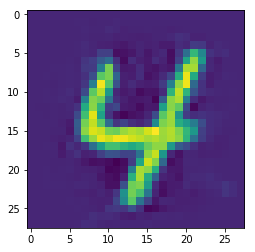

351 35.6715987501331


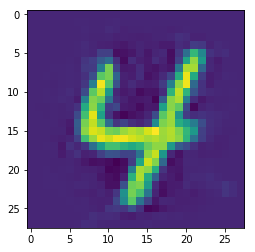

401 35.67947637959413


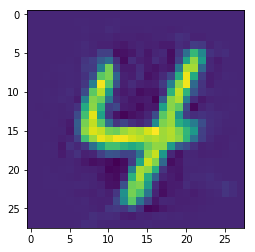

451 35.68689981865154


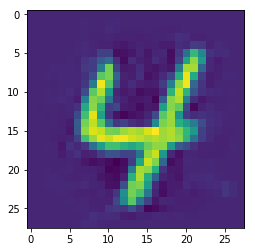

501 35.69583040995329


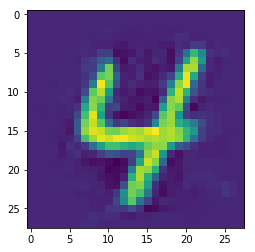

551 35.70703385399499


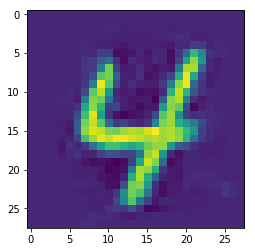

601 35.72044487666148


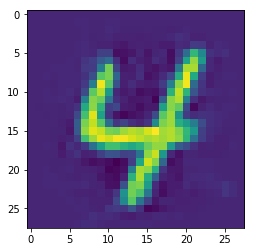

651 35.736112433500914


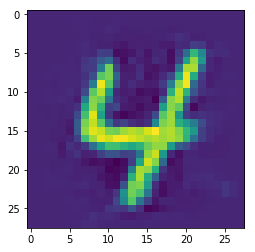

701 35.75301539260007


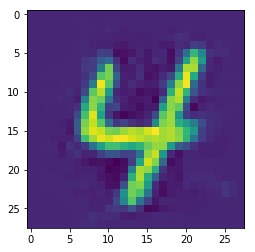

751 35.766171522340144


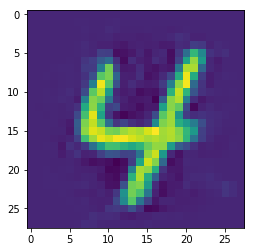

774 35.77950283825312


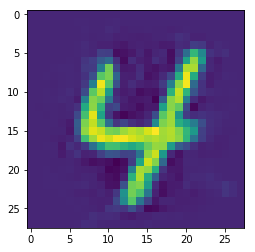

775 35.780466315421044


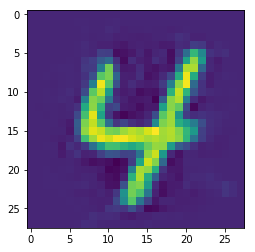

776 35.781416164772935


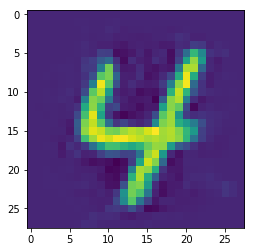

777 35.78160599559232


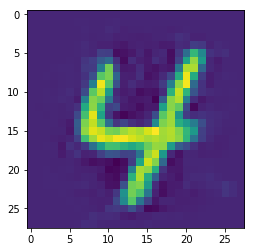

778 35.781668602886754


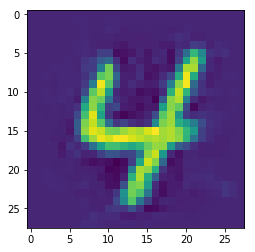

779 35.782013025438054


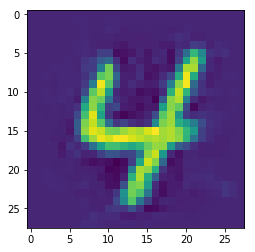

780 35.78232027917953


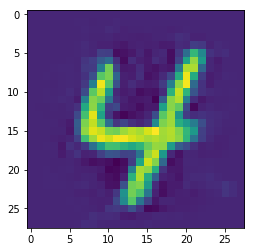

781 35.782634222378064


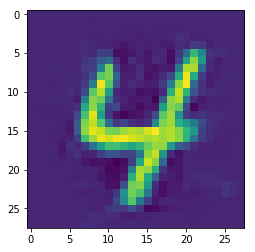

782 35.78303465630102


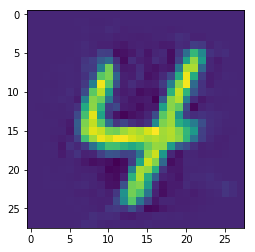

783 35.78322998056807


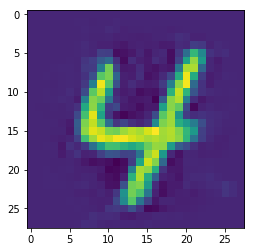

In [8]:
index = 106

inds = np.arange(1, 784, 50)
inds = list(inds)
inds.extend(list(np.arange(774,784)))

kpca_results = []
print(inds)
for i in inds:
    pca_test[:, -i:] = 0.0
    inverse_test = pca.inverse_transform(pca_test)
    
    res = np.mean((inverse_test - x_test)**2)**0.5
    kpca_results.append(res)
    
    print(i, res)
    plt.imshow(inverse_test[index].reshape(28,28))
    plt.show()

### SparsePCA

In [7]:
from sklearn.decomposition import SparsePCA

pca = SparsePCA(n_jobs=-1)

pca.fit(x_train[:1000])

Process ForkPoolWorker-1:
Process ForkPoolWorker-3:


KeyboardInterrupt: 

In [ ]:
pca_test = pca.transform(x_test)
print(pca_test.shape)

In [ ]:
index = 106

inds = np.arange(1, 784, 50)
inds = list(inds)
inds.extend(list(np.arange(774,784)))

spca_results = []
print(inds)
for i in inds:
    pca_test[:, -i:] = 0.0
    inverse_test = pca.inverse_transform(pca_test)
    
    res = np.mean((inverse_test - x_test)**2)**0.5
    spca_results.append(res)
    
    print(i, res)
    plt.imshow(inverse_test[index].reshape(28,28))
    plt.show()